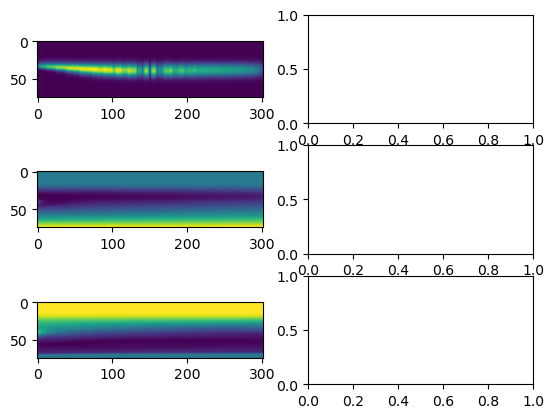

<Figure size 640x480 with 0 Axes>

In [1]:
import wandb
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path


data_path = Path("../") / "data/data-HH-cc-pcvqz-ccsdt-3"
child = data_path / "0.7500"

data_file = list(child.glob("rho_inv_mrks.npy"))
masks_v_file = list(child.glob("mrks.npy"))
lda_v_file = list(child.glob("lda.npy"))
weight_file = list(child.glob("weight.npy"))
masks_e_file = list(child.glob("mrks_e.npy"))
lda_e_file = list(child.glob("lda_e.npy"))
masks_tr_file = list(child.glob("tr.npy"))

data = np.load(data_file[0])
masks_e = (
    (np.load(masks_e_file[0]) + np.load(masks_tr_file[0])) / (data + 1e-14) - np.load(lda_e_file[0])
)
masks_v = np.load(masks_v_file[0]) - np.load(lda_v_file[0])
weight = np.load(weight_file[0])

data_imgs = data.copy()
data_weight = weight.copy()
data_e_masks = masks_e.copy()
data_v_masks = masks_v.copy()

data_imgs = data_imgs * data_weight
# data_masks = data_masks * data_weight

f, axes = plt.subplots(3, 2)
axes[0, 0].imshow(data_imgs[0, :, :])
axes[1, 0].imshow(data_v_masks[0, :, :])
axes[2, 0].imshow(data_e_masks[0, :, :])

# data_sort_index = np.zeros_like(data_imgs, dtype=int)
# data_imgs_sort = np.zeros_like(data_imgs, dtype=float)
# data_e_masks_sort = np.zeros_like(data_e_masks, dtype=float)
# data_v_masks_sort = np.zeros_like(data_v_masks, dtype=float)

# for i in range(data_imgs.shape[0]):
#     for j in range(data_imgs.shape[1]):
#         data_sort_index[i, j, :] = np.argsort(data_imgs[i, j, :])
#         data_imgs_sort[i, j, :] = data_imgs[i, j, data_sort_index[i, j, :]]
#         data_e_masks_sort[i, j, :] = data_e_masks[i, j, data_sort_index[i, j, :]]
#         data_v_masks_sort[i, j, :] = data_v_masks[i, j, data_sort_index[i, j, :]]

# # data_sort_index = np.argsort(data_imgs.flatten())
# # data_imgs_sort = (data_imgs.flatten()[data_sort_index]).reshape(data_imgs.shape)
# # data_masks_sort = (data_masks.flatten()[data_sort_index]).reshape(data_masks.shape)

# axes[0, 1].imshow(data_imgs_sort[0, :, :])
# axes[1, 1].imshow(data_v_masks_sort[0, :, :])
# axes[2, 1].imshow(data_e_masks_sort[0, :, :])
plt.show()
plt.clf()

In [2]:
data_imgs.shape

(2, 75, 302)

In [74]:
np.array([-0.2438, 0.9698]) * 1.25

array([-0.30475,  1.21225])